In [1]:
#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [8]:
#  Load dataset
data = pd.read_csv(r"C:\Users\dell\OneDrive\Documents\bank-full.csv",sep=';')
print(data.head())
print(data.info())
print("Columns in dataset:", data.columns)

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

In [9]:
print(data['y'].unique())

['no' 'yes']


In [10]:
# 3️⃣ Detect target column automatically
target_col = None
for col in data.columns:
    unique_vals = data[col].dropna().unique()
    if len(unique_vals) == 2 and all(str(v).lower() in ['yes','no','1','0'] for v in unique_vals):
        target_col = col
        break

if target_col is None:
    raise ValueError("No binary target column (yes/no or 1/0) found.")
print(f"Detected target column: {target_col}")


Detected target column: default


In [21]:
# Prepare features and target
X = data.drop(target_col, axis=1)
print(X)
y = data[target_col].apply(lambda x: 1 if str(x).lower()=='yes' or str(x)=='1' else 0)
print(y)

       age           job   marital  education  balance housing loan  \
0       58    management   married   tertiary     2143     yes   no   
1       44    technician    single  secondary       29     yes   no   
2       33  entrepreneur   married  secondary        2     yes  yes   
3       47   blue-collar   married    unknown     1506     yes   no   
4       33       unknown    single    unknown        1      no   no   
...    ...           ...       ...        ...      ...     ...  ...   
45206   51    technician   married   tertiary      825      no   no   
45207   71       retired  divorced    primary     1729      no   no   
45208   72       retired   married  secondary     5715      no   no   
45209   57   blue-collar   married  secondary      668      no   no   
45210   37  entrepreneur   married  secondary     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  

In [12]:
#  Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)


In [13]:
#  Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [14]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
#  Train Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

#  Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

#  Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9845184120314056

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8905
           1       0.25      0.01      0.01       138

    accuracy                           0.98      9043
   macro avg       0.62      0.50      0.50      9043
weighted avg       0.97      0.98      0.98      9043



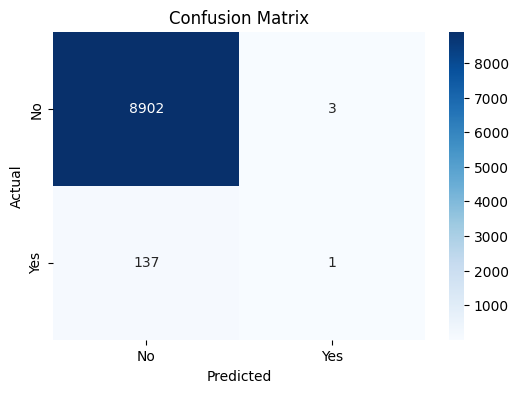

In [16]:
#  Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


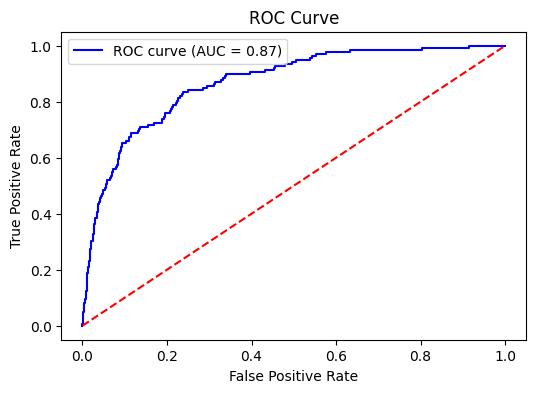

In [17]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [18]:
#  Coefficient Interpretation
features = X_encoded.columns
coefficients = model.coef_[0]

coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
})
coef_df['Impact'] = coef_df['Coefficient'].apply(lambda x: "Increase" if x>0 else "Decrease")
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print("\nTop features based on impact:\n", coef_df.head(15))


Top features based on impact:
               Feature  Coefficient    Impact
35          month_nov     0.523166  Increase
40   poutcome_unknown     0.479289  Increase
31          month_jul     0.479220  Increase
34          month_may     0.445981  Increase
27          month_aug     0.347934  Increase
32          month_jun     0.308723  Increase
10     job_management     0.261178  Increase
5               pdays     0.250142  Increase
29          month_feb     0.239628  Increase
24           loan_yes     0.225452  Increase
8    job_entrepreneur     0.194271  Increase
30          month_jan     0.176178  Increase
7     job_blue-collar     0.171242  Increase
16     job_unemployed     0.135698  Increase
12  job_self-employed     0.132660  Increase


C:\Users\dell\AppData\Local\Temp\ipykernel_10496\846059854.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(15), palette='coolwarm')


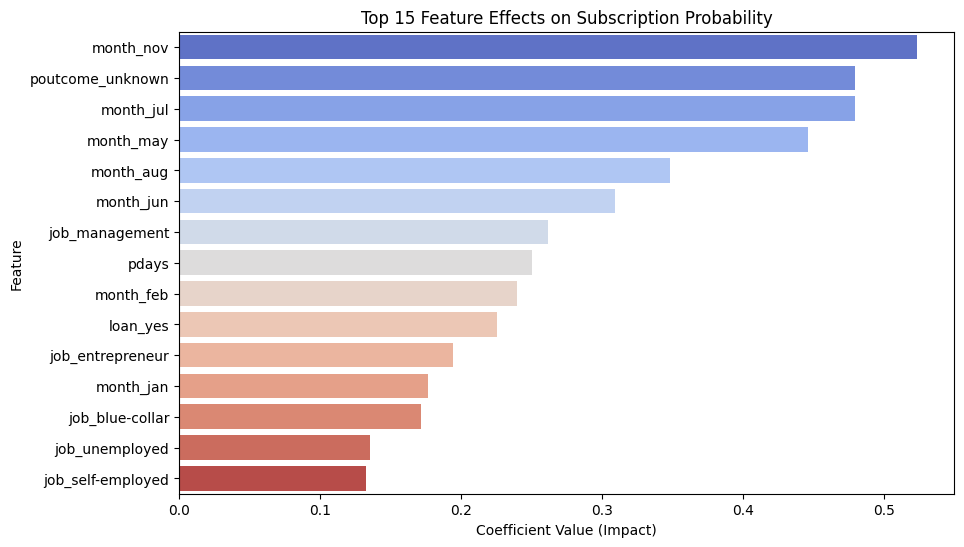

In [19]:
#  Coefficient Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(15), palette='coolwarm')
plt.title("Top 15 Feature Effects on Subscription Probability")
plt.xlabel("Coefficient Value (Impact)")
plt.ylabel("Feature")
plt.show()

In [20]:
#  Conclusion
print("\n✅ Conclusion:")
print(f"- Accuracy: {accuracy:.2f} → predicts correctly around {accuracy*100:.0f}% of cases.")
print(f"- ROC-AUC: {roc_auc:.2f} → good discrimination between subscribers and non-subscribers.")
print("- Positive coefficients increase subscription probability; negative decrease it.")
print("- Features with largest positive impact are most likely to influence subscriptions.")
print("- This analysis helps banks target marketing campaigns effectively.")


✅ Conclusion:
- Accuracy: 0.98 → predicts correctly around 98% of cases.
- ROC-AUC: 0.87 → good discrimination between subscribers and non-subscribers.
- Positive coefficients increase subscription probability; negative decrease it.
- Features with largest positive impact are most likely to influence subscriptions.
- This analysis helps banks target marketing campaigns effectively.
